### Curse of Dimensionality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

from sklearn.utils.extmath import randomized_svd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

Sources:
    
https://medium.com/diogo-menezes-borges/give-me-the-antidote-for-the-curse-of-dimensionality-b14bce4bf4d2

Imagine you created a classifier that helps you distinguish 🐱 from 🐶 according to some features you gave, such as snout’s length, paw size, weight, color and type of fur. You have five features that in combination could be used by a classification algorithm to help you classify your samples. You start to think that maybe you can improve the classifier’s results if you just add more features based on other distinguishable characteristics. Maybe you can but probably you won’t. **As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially.**

<img src="images/dim1.png" width=500>

### Understanding Dimensionality

Before going into details about the curse let’s understand the impact of dimensionality has on our datasets. Let’s imagine you have five boxes (dataset training observations). We want each one of these boxes to represent a part of that one-dimension, so we uniformly distribute them along a single line (feature X). At the moment, each one of these boxes owns an equal size subset (1/5) of this segment.

<img src="images/dim2.png" width=500>

Now, let’s add another dimension (feature Y) and move into a two-dimensional space. It is desirable to maintain the same distance relationship between our data points, as in the one-dimension space. Since now we’re in a two-dimension space we must fill all empty spaces with more boxes so that we can maintain this distance between samples. In the end, we will end up with 25 data points available with each point occupying 1/25 of the space.

Going from one-dimension to two-dimensions altered the total number of data points from 5 into 25. What happens if we go into three-dimensional space? In order to cover the whole dimensional space, maintaining the same distance between points, we will end up having to find 125 data points ( 5³ = boxes) with each point occupying 1/125 of the space. Therefore, the growth is exponential and everytime you increase the number of dimensions, more boxes will have to be added to fill the empty spaces! Add another dimension and you’ll get 645 boxes, another one and there’s 3125, six dimensions and you see 15625, and so forth.

### The curse of dimensionality and overfitting

In the previous example we saw that at every higher dimension the number of data points (boxes) in our space had to increase as well in order to maintain the same distance relationship between them. Usually, in real-life problem this is an issue. When you add a new feature to your model sometimes not enough data will be added to maintain previous relations and thus the new feature might not have a positive impact on the classifier. Therefore, you end up making it more complex without taking any advantage of it.

Let’s go back to our cats and dogs example to understand this so-called curse. You start by building a classifier that only takes into account a single feature, for example, the snout’s length. The separation is not perfect but our classifier does classify each animal as a dog or a cat.

<img src="images/dim3.png" width=500>

Nevertheless, we believe this classifier can do better! So, you decide to add a new feature (e.g. paw size). It becomes clear to us that only one feature wouldn’t cut it since we obtain better results with the introduction of the latter. However, with this feature, we still cannot make a perfect linear separation between our observations.

<img src="images/dim4.png" width=500>

Following this line of thought, there’s a high probability our model’s classification capacity will increase if we add another feature. Let’s do that by adding the weight! Great! By adding the last feature our classifier is able to create a linear combination of the three features in order to obtain perfect classification results on our training dataset.

<img src="images/dim5.png" width=500>

From this example, one would conclude that more features you had the better our classifier will perform, correct? WRONG! As shown by the first image on this post, there’s an optimal number of features to achieve. Above that, the classifier will lose performance. Moreover, note that the density of our training samples decreased exponentially as we increased the dimensionality of the problem which also can become a problem.


As we add more features, the space between the observations grows, and it becomes sparser and sparser. This sparsity helps our classifier to classify our observations since it becomes more easy to find a separable hyperplane due to the fact that the likelihood of our training samples lying on the wrong side of the best hyperplane becomes infinitely small as you increase the number of features to infinite. However, by projecting this high dimensional classification into a lower dimensional space we are struck by an evident problem in Machine Learning: **Overfitting**!

<img src="images/dim6.png" width=500>

Although our data was linearly separable in a three-dimensional space, this is not the case when we lower one dimension in the feature space. In fact, when we added the third feature the classifier learned the appearance of a specific instance and exceptions of our training dataset, hence overfitting and dooming our classifier to failure if tested with real-world data. Thus, we will get a better classifier by only using two features, since it will generalise better to any future dataset.

<img src="images/dim7.png" width=500>



### Another sparcity example

We mentioned that as we add more features, the space between the observations grows, and it becomes sparser and sparser. If you need another example of this, think about the unit cube in $n$-dimensions. This is hard to visualize for $n>3$. Algebraically, this is not too difficult to think about. It's just all the $n$-tuples of numbers between 0 and 1.

#### How big is the unit cube?

What is the length of the main-diagonal of the $n$-cube? In 2 dimensions, it's $\sqrt 2$ and in 3 dimensions it's $\sqrt 3$. In 100-dimensional space, the main diagonal is 10 units long. In 1M-dimensional space, the main diagonal is 1,000 units long. The 1M-dimensional unit cube has points that are pretty far apart from one another, even though all of the individual components of the vectors are bounded between 0 and 1.

### Avoiding this curse

Before going any further, have in mind that there is no fixed rule that defines how many features should be used in a regression/classification problem. The magic number depends on the amount of training data available, the complexity of the decision boundaries and the type of classifier used. For example, if a theoretical number of training examples was available, such as in our example of the boxes we would not have to deal with this curse and we could simply use an infinite number of features to obtain the perfect classification.

One main approach to reduce dimensionality is projection:

### Projection

As stated before, “in most real-world problems training instances are not spread uniformly across all dimensions. You might have features that are constant while others are highly correlated which in the end makes all training instances lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.” — Hands-on Machine Learning with Scikit-Learn & TensorFlow.

Consider the Swiss roll in Figure A whose points are plotted discretely in Figure B. If we project the points in Figure B perpendicularly onto to the 2D X-Y space then we get the image in Figure C. This approach is not always the best for dimensionality reduction. For example, the famous Swiss roll shown below is a good example why this approach is not good because by dropping the axis Z and projecting the instances in a 2D environment, we end up squashing the different layers of the Swiss roll together (Figure C). The desired simplification would be to unroll the Swiss roll to obtain the 2D image in Figure D.

<img src="images/dim8.png" width=500>

Examples of this approach are Singular Value Decomposition (SVD), Principal Component Analysis (PCA), and Linear Discriminant Analysis (LDA). We've already covered SVD and we'll cover PCA now.

### Principal Component Analysis
It starts by identifying the hyperplane that lies closest to the data and then it projects the data onto it.
- **Maximizes Variance** : Finds direction/dimension of maximum variance of the data.
- **Orthogonal** : Finds directions which are orthogonal (perpendicular to the first component that it found).

Consider the following image:

<img src="images/dim9.png" width=500>

We have on the left a representation of a simple 2D dataset with three 1D hyperplanes. On the other hand, on the right, the result of the projection of the dataset onto each one of those one-dimensional hyperplanes is illustrated. Looking at the three, it appears that the hyperplane represented by the solid line is the one that maximizes variance as desired. Therefore, the solid line is the most reasonable selection for a lower dimension. It also finds a second axis (dotted line), orthogonal to the first that accounts for the largest amount of remaining variance.


If we were dealing with higher dimensions, PCA would find more orthogonal axes to the previous axes (for this case a third one if we’re dealing with 3D); as many axes as the number of dimensions in the dataset. The unit vector that defines the ith axis is called Principal Component (PC). In this case, the first PC is C1 and the second PC is C2.

### Projecting Down to d Dimensions

Once we’ve identified our principal components it is time to reduce the dimensionality of the dataset down to d dimensions by projecting it to the hyperplane defined by the first d principal components.


Basically, we compute the dot product of the training dataset matrix X by the matrix Wd which contains the first d principal components. For this specific case Wd would be composed of the vectors C1 and C2.


Usually a good number of dimensions is the one that adds up to a sufficiently large portion of the variance (~95%).

### How is PCA related to SVD?

The covariance matrix, C, can be computed for a data set with zero mean by calculating $Cov(X)=\frac{1}{n-1}X^T X$.

Principal component analysis (PCA) is usually explained via an eigen-decomposition of the covariance matrix. 

Singular Value Decomposition (SVD) is a related decomposition that can be used to solve the PCA problem as well, and with better numeric properties.

We can obtain the decomposition of the covariance matrix by performing singular value decomposition (SVD) on the data matrix 𝐗:

$$Cov(X) = \frac{1}{n-1} X^T X $$

$$X = U\Sigma V^T$$

$$Cov(X) = Cov(U\Sigma V^T)$$

Then using the definition of covariance matrix on matrix $U\Sigma V^T$, we have:

$$\frac{1}{n-1}X^TX = \frac{1}{n-1} (U\Sigma V^T)^T(U\Sigma V^T)$$  

Since $(AB)^T = B^T A^T$ by a property of transposes, we have:

$$\frac{1}{n-1}X^TX = \frac{1}{n-1} (V^T)^T \Sigma^T U^T (U\Sigma V^T) = \frac{1}{n-1} V \Sigma^T U^T U\Sigma V^T$$ 

but $U^T U = I$ since the eigenvectors are orthonormal and $\Sigma^T = \Sigma$ since $\Sigma$ is diagonal.

So $$\frac{1}{n-1}X^TX = \frac{1}{n-1} V \Sigma^2 V^T$$ 

And therefore $$X^TX = V \Sigma^2 V^T$$

In summary, by decomposing $X$ into its SVD decomposition, we have obtained the eigenvalue decomposition of the covariance matrix, $X^TX$, which gives us the Principal Components.

### PCA Example

Here's a concrete example of what PCA is doing. Clearly, all of our variation with dots along a straight line lies in the direction of the line:

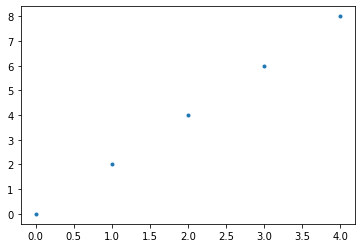

In [3]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]
df = pd.DataFrame(list(zip(x,y)), columns = ['x', 'y'])

plt.plot(x,y,'.')

Let's perform an SVD decomposition using two components and notice VT in particular:

In [5]:
U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=2, random_state=2022)
print(VT)

[[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]


In [6]:
print(Sigma)

[1.22474487e+01 5.68763416e-32]


We can see that these vectors are orthnormal, meaning that there norm is 1 and they are perpendicular to each other:

In [7]:
print(np.dot(VT[0], VT[0]))
print(np.dot(VT[0], VT[1]))

1.0000000000000002
0.0


These are the two principal components, namely, the first vector goes in the direction of the most variation of the points and the second vector is perpendicular to the first. I will save these vectors in the form of tuples that will help with plotting:

In [8]:
principalcomponent1 = (VT[0][0], VT[0][1])
principalcomponent2 = (VT[1][0], VT[1][1])

Now, let's plot the vectors alongside the original points. Note that I should connect a vector like (2,3) by connecting a line between the points (0,0) and (2,3). Also note that I am only multiplying by 10 in order to make the vector lines longer to visualize the plot better:

[]

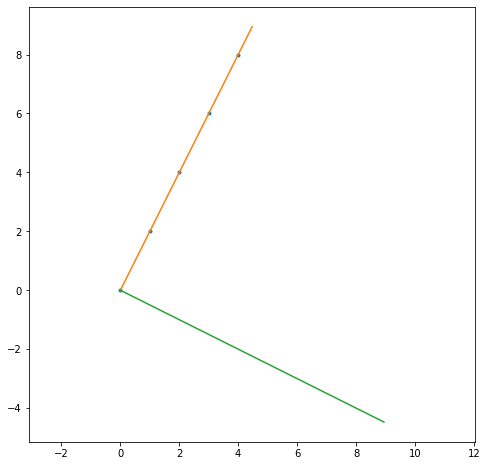

In [10]:
scale = 10
plt.figure(figsize=(8,8))
plt.plot(x,y,'.')
plt.plot([0,scale*principalcomponent1[0]],[0,scale*principalcomponent1[1]])
plt.plot([0,scale*principalcomponent2[0]],[0,scale*principalcomponent2[1]])
plt.axis('equal')
plt.plot()

What if the points weren't quite perfectly along a straight line? PCA would still do a great job:

(-0.4614034963387731, 9.689473423114235, -4.506660568857517, 9.882104712281794)

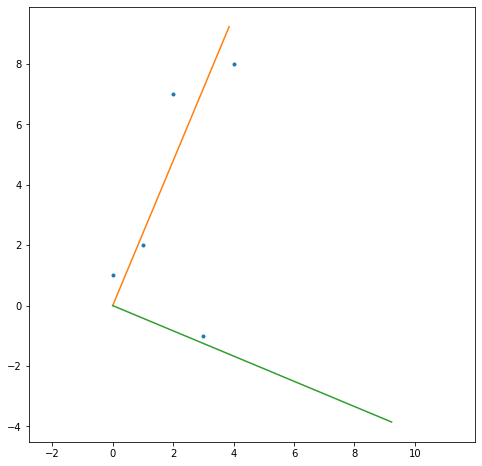

In [13]:
x = [0,1,2,3,4]
y = [1,2,7,-1,8]
df = pd.DataFrame(list(zip(x,y)), columns = ['x', 'y'])
U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=2)
principalcomponent1 = (VT[0][0], VT[0][1])
principalcomponent2 = (VT[1][0], VT[1][1])
scale = 10
plt.figure(figsize=(8,8))
plt.plot(x,y,'.')
plt.plot([0,scale*principalcomponent1[0]],[0,scale*principalcomponent1[1]])
plt.plot([0,scale*principalcomponent2[0]],[0,scale*principalcomponent2[1]])
plt.axis('equal')

One last thing...what if we had 3 columns of data instead of two? (Formed by according to the equation $z=2x-3y$). If we use all three SVD components, then we get this set of vectors VT:

In [15]:
x = [0,1,2,3,4]
y = [2,3,4,5,6]
z = [-6,7,-8,-12,-10]
df = pd.DataFrame(list(zip(x,y,z)), columns = ['x', 'y', 'z'])

U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=3)
print(VT)

[[ 0.21584542  0.36749877 -0.90462999]
 [ 0.41150817  0.80593613  0.42559134]
 [-0.88547828  0.46412457 -0.02272887]]


Suppose that we decided it was too expensive to use all 3 latent features and we decided to use only 2 instead. Then the two vectors gained using an SVD decomposition would be exactly the same as the first two that were obtained using n=3 above:

In [16]:
U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=2)
print(VT)

[[ 0.21584542  0.36749877 -0.90462999]
 [ 0.41150817  0.80593613  0.42559134]]


Let's try visualizing as much as we can. Notice that if we plot x versus z, then we do pick up a lot of variation in along the main PCA component. These vectors won't look exactly diagonal since we are only visualizing them in 2D instead of 3:

Text(0, 0.5, 'z')

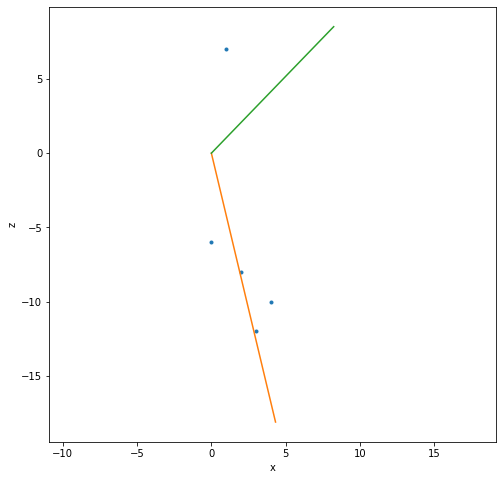

In [17]:
principalcomponent1 = (VT[0][0], VT[0][2])
principalcomponent2 = (VT[1][0], VT[1][2])
scale = 20
plt.figure(figsize=(8,8))
plt.plot(x,z,'.')
plt.plot([0,scale*principalcomponent1[0]],[0,scale*principalcomponent1[1]])
plt.plot([0,scale*principalcomponent2[0]],[0,scale*principalcomponent2[1]])
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')

Notice that if we plot y versus z then we also pick up a lot of variation in that direction. Once again, these vectors won't look exactly diagonal since we are only visualizing them in 2D instead of 3:

Text(0, 0.5, 'z')

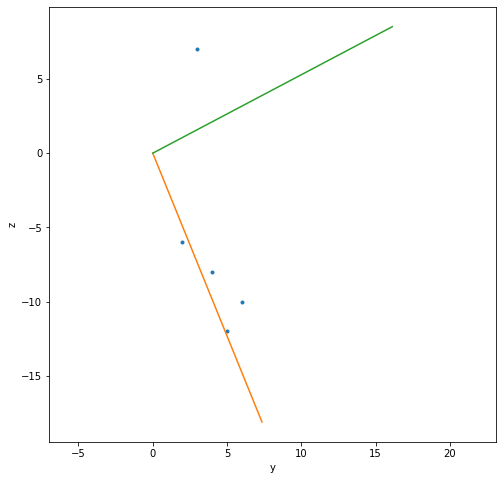

In [18]:
principalcomponent1 = (VT[0][1], VT[0][2])
principalcomponent2 = (VT[1][1], VT[1][2])
scale = 20
plt.figure(figsize=(8,8))
plt.plot(y,z,'.')
plt.plot([0,scale*principalcomponent1[0]],[0,scale*principalcomponent1[1]])
plt.plot([0,scale*principalcomponent2[0]],[0,scale*principalcomponent2[1]])
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('z')

Actually, we can use matplotlib to plot things in 3d. Let's do that now:

Text(0.5, 0, 'Z Label')

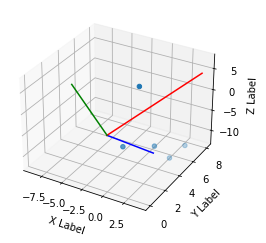

In [19]:
U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=3)

scale=10
pc1 = (VT[0][0], VT[0][1], VT[0][2])
pc2 = (VT[1][0], VT[1][1], VT[1][2])
pc3 = (VT[2][0], VT[2][1], VT[2][2])

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D([0,scale*pc1[0]],[0,scale*pc1[1]], [0,scale*pc1[2]], 'blue')
ax.plot3D([0,scale*pc2[0]],[0,scale*pc2[1]], [0,scale*pc2[2]], 'red')
ax.plot3D([0,scale*pc3[0]],[0,scale*pc3[1]], [0,scale*pc3[2]], 'green')

ax.scatter3D(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

If we use the notebook feature of matplotlib, then we are even able to drag the plot around in order to visualize it at different angles:

<IPython.core.display.Javascript object>


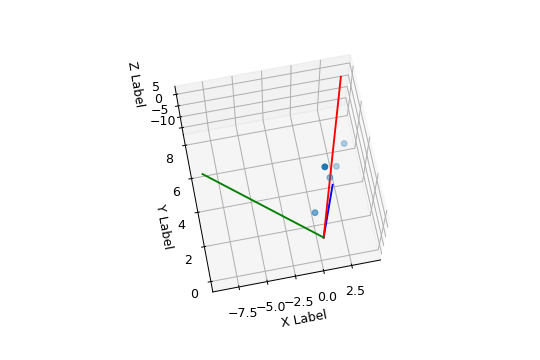

In [20]:
%matplotlib notebook

U, Sigma, VT = randomized_svd(df.to_numpy(), n_components=3)

scale=10
pc1 = (VT[0][0], VT[0][1], VT[0][2])
pc2 = (VT[1][0], VT[1][1], VT[1][2])
pc3 = (VT[2][0], VT[2][1], VT[2][2])

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D([0,scale*pc1[0]],[0,scale*pc1[1]], [0,scale*pc1[2]], 'blue')
ax.plot3D([0,scale*pc2[0]],[0,scale*pc2[1]], [0,scale*pc2[2]], 'red')
ax.plot3D([0,scale*pc3[0]],[0,scale*pc3[1]], [0,scale*pc3[2]], 'green')

ax.scatter3D(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

### Applications of SVD & PCA


### 1.EigenFaces

In the last chapter, we explored image compression. If SVD is applied to a bunch of face shots, we get eigenfaces. Which look creepy, but are really useful for facial detection.

![](http://archive.cnx.org/resources/28b7669c052b1d7ec07962bb69aa5cc3733eb868/PCA_Face.png)

### 2.Google's PageRank

PageRank is a SVD on a markov chain. It helps Google figure out which items to give you to you when you search for something.

### 3.Document Similarity using LSA

Latent Semantic Analysis is just SVD applied to a word/document matrix. It will help us to figure out which types of documents are similar and pick out the document's most important themes. We'll get to this in our next chapter on Natural Language Processing.

### 4.Recommender Systems
Recommendation systems can be thought of as applying SVD to an User/Item matrix. We'll start on this tomorrow.

### Homework


Read these two posts (make sure to click on the "Show PCA" button in the first post because the visualization is really good!)

http://setosa.io/ev/principal-component-analysis/

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Then comment on Google Classroom about what you learned.